Створення набору даних для бінарної класифікації

In [16]:
import pandas as pd
import numpy as np

def generate_binary_classification_data(num_samples, features_range, grades_range, random_seed):
    np.random.seed(random_seed)

    feature_1 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)))
    feature_2 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)))

    labels = np.where((feature_1 >= grades_range[0]) & (feature_1 <= grades_range[1]) &
                      (feature_2 >= grades_range[0]) & (feature_2 <= grades_range[1]), 1, 0)

    df = pd.DataFrame({'Labs': feature_1, 'Practices': feature_2, 'Target': labels})

    return df

binary_data = generate_binary_classification_data(num_samples=200, features_range=(1, 100), grades_range=(60, 100), random_seed=56)

binary_data.to_csv('binary_data.csv', index=False)
binary_data

,Labs,Practices,Target
0,98.0,7.0,0
1,34.0,29.0,0
2,68.0,50.0,0
3,20.0,10.0,0
4,36.0,85.0,0
...,...,...,...
195,98.0,93.0,1
196,6.0,37.0,0
197,5.0,23.0,0
198,98.0,19.0,0


In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = binary_data.drop('Target', axis=1)
y = binary_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

binary_model = Sequential([
  Dense(10, activation='relu', input_shape=(X.shape[1],)),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

binary_model.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])

binary_history = binary_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

binary_test_loss, binary_test_accuracy = binary_model.evaluate(X_test_scaled, y_test)
print(f"Втрата моделі на тестовому наборі: {binary_test_loss}")
print(f"Точність моделі на тестовому наборі: {100*binary_test_accuracy:.2f}%")

Epoch 1/50
5/5 [==============================] - 1s 47ms/step - loss: 0.6812 - accuracy: 0.5250 - val_loss: 0.6531 - val_accuracy: 0.8000
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6729 - accuracy: 0.5688 - val_loss: 0.6463 - val_accuracy: 0.8250
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6638 - accuracy: 0.6375 - val_loss: 0.6392 - val_accuracy: 0.8500
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6548 - accuracy: 0.7500 - val_loss: 0.6320 - val_accuracy: 0.9500
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.8562 - val_loss: 0.6248 - val_accuracy: 0.9750
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6366 - accuracy: 0.9000 - val_loss: 0.6175 - val_accuracy: 0.9750
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6274 - accuracy: 0.9500 - val_loss: 0.6101 - val_accuracy: 0.9500
Epoch 8/50
5/5 [================

In [18]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

improved_binary_model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

improved_binary_model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) 

def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor = 0.9
    decay_step = 10
    lr = initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / decay_step))
    return lr

lr_improved_binary_scheduler = LearningRateScheduler(lr_schedule)

improved_binary_history = improved_binary_model.fit(X_train_scaled, 
                      y_train, 
                      epochs=300,
                      validation_data=(X_test_scaled, y_test),
                      callbacks=[lr_improved_binary_scheduler])

improved_binary_loss, improved_binary_accuracy = improved_binary_model.evaluate(X_test_scaled, y_test)
print(f"\nВтрата моделі на тестовому наборі: {improved_binary_loss}")
print(f"Точність моделі на тестовому наборі: {100*improved_binary_accuracy:.2f}%")

binary_model_accuracy = binary_history.history['accuracy'][-1]
improved_binary_model_accuracy = improved_binary_history.history['accuracy'][-1]

binary_model_results = [["binary_model", binary_model_accuracy],
                 ["improved_binary_model", improved_binary_model_accuracy]]
all_binary_results = pd.DataFrame(binary_model_results, columns=["model", "accuracy"])
print("\nn", all_binary_results)

Epoch 1/300
5/5 [==============================] - 1s 46ms/step - loss: 0.6380 - accuracy: 0.8562 - val_loss: 0.6126 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 2/300
5/5 [==============================] - 0s 10ms/step - loss: 0.5856 - accuracy: 0.8562 - val_loss: 0.5589 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3/300
5/5 [==============================] - 0s 8ms/step - loss: 0.5321 - accuracy: 0.8562 - val_loss: 0.5039 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 4/300
5/5 [==============================] - 0s 8ms/step - loss: 0.4780 - accuracy: 0.8562 - val_loss: 0.4486 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 5/300
5/5 [==============================] - 0s 9ms/step - loss: 0.4253 - accuracy: 0.8562 - val_loss: 0.3959 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 6/300
5/5 [==============================] - 0s 9ms/step - loss: 0.3793 - accuracy: 0.8562 - val_loss: 0.3486 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 7/300
5/5 [==============================] - 0s 9ms/step - loss: 0.3335 - accura

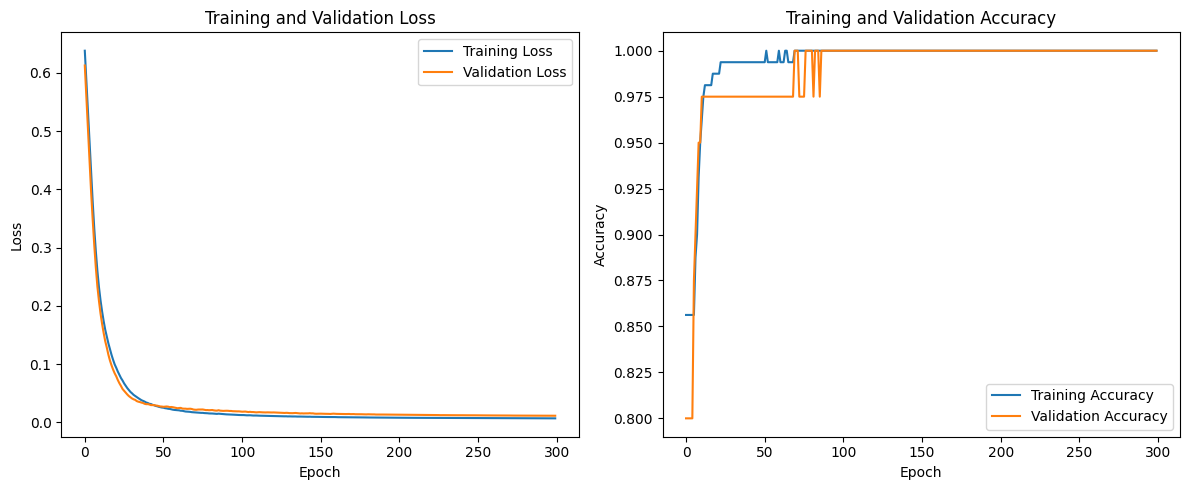

In [19]:
import matplotlib.pyplot as plt

train_loss = improved_binary_history.history['loss']
val_loss = improved_binary_history.history['val_loss']

train_accuracy = improved_binary_history.history['accuracy']
val_accuracy = improved_binary_history.history['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Створення набору даних для мультиклассової класифікації

In [12]:
import pandas as pd
import numpy as np

def generate_classification_data(num_samples, features_range, random_seed):
    np.random.seed(random_seed)

    feature_1 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)), 1)
    feature_2 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)), 1)

    conditions = [
        (feature_1 < 36) | (feature_2 < 36),
        (feature_1 >= 36) & (feature_1 < 60) & (feature_2 >= 36) & (feature_2 < 60),
        (feature_1 >= 60) & (feature_2 >= 60)
    ]
    values = ['Low', 'Medium', 'High']

    labels = np.select(conditions, values, default='Low')

    df = pd.DataFrame({'Feature1': feature_1, 'Feature2': feature_2, 'Target': labels})

    return df


multiclass_data = generate_classification_data(num_samples=1000, features_range=(1, 100), random_seed=56)

multiclass_data.to_csv('multiclass_data.csv', index=False)
multiclass_data

,Feature1,Feature2,Target
0,78.0,91.6,High
1,24.5,72.4,Low
2,82.6,42.3,Low
3,96.6,83.8,High
4,97.3,1.3,Low
...,...,...,...
995,18.9,14.7,Low
996,19.5,32.0,Low
997,8.4,37.6,Low
998,37.9,8.6,Low


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = multiclass_data.drop('Target', axis=1)
y = multiclass_data['Target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multiclass_model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

multiclass_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=["accuracy"])

multiclass_history = multiclass_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

multiclass_test_loss, multiclass_test_acc = multiclass_model.evaluate(X_test_scaled, y_test)
print(f"Втрата моделі на тестовому наборі: {multiclass_test_loss}")
print(f"Точність моделі на тестовому наборі: {100*multiclass_test_acc:.2f}%")

Epoch 1/50
25/25 [==============================] - 1s 8ms/step - loss: 0.7754 - accuracy: 0.7812 - val_loss: 0.6872 - val_accuracy: 0.9100
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.9250 - val_loss: 0.5752 - val_accuracy: 0.9350
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.9137 - val_loss: 0.4871 - val_accuracy: 0.8850
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.8900 - val_loss: 0.4196 - val_accuracy: 0.8750
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8900 - val_loss: 0.3697 - val_accuracy: 0.8800
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.9013 - val_loss: 0.3322 - val_accuracy: 0.9100
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.9137 - val_loss: 0.3042 - val_accuracy: 0.9250
Epoch 8/50
25/25 [==

In [14]:
improved_multiclass_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

improved_multiclass_model.compile(loss='sparse_categorical_crossentropy',  
                 optimizer='adam',
                 metrics=["accuracy"])

from tensorflow.keras.callbacks import LearningRateScheduler
import math

def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor = 0.9
    decay_step = 10
    lr = initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / decay_step))
    return lr

lr_multiclass_scheduler = LearningRateScheduler(lr_schedule)

improved_multiclass_history = improved_multiclass_model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_test_scaled, y_test), callbacks=[lr_multiclass_scheduler])

multiclass_model_accuracy = multiclass_history.history['accuracy'][-1]
improved_multiclass_model_accuracy = improved_multiclass_history.history['accuracy'][-1]

multiclass_model_results = [["multiclass_model", multiclass_model_accuracy],
                 ["improved_multiclass_model", improved_multiclass_model_accuracy]]
all_multiclass_results = pd.DataFrame(multiclass_model_results, columns=["model", "accuracy"])
print("\nn", all_multiclass_results)

Epoch 1/300
25/25 [==============================] - 1s 10ms/step - loss: 0.8488 - accuracy: 0.7862 - val_loss: 0.6154 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.9413 - val_loss: 0.3059 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.9488 - val_loss: 0.2234 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 0.1972 - accuracy: 0.9538 - val_loss: 0.1931 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.9500 - val_loss: 0.1751 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 0.1601 - accuracy: 0.9475 - val_loss: 0.1600 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 7/300
25/25 [==============================] - 0s 3ms/step - loss: 0.

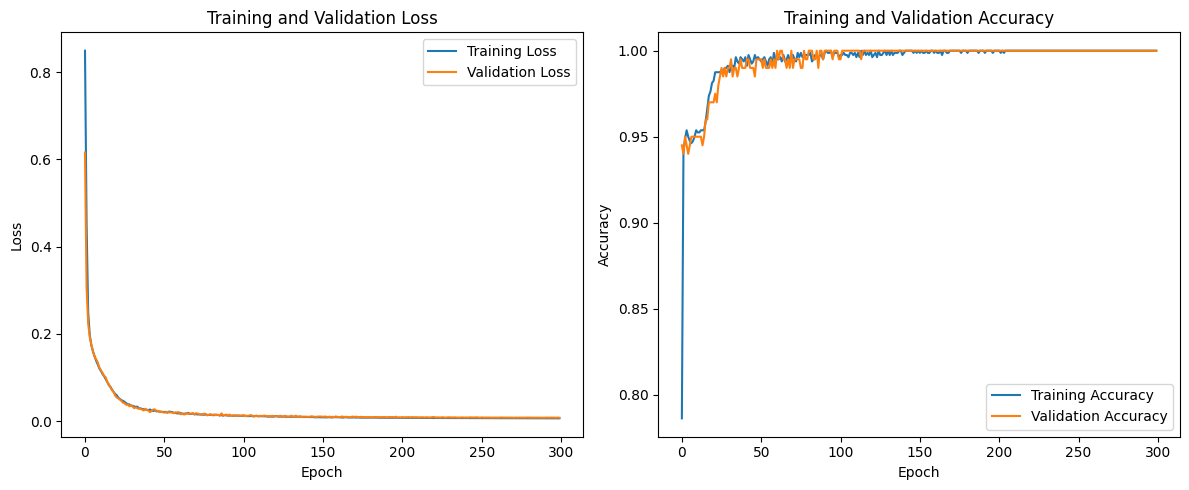

In [15]:
import matplotlib.pyplot as plt

train_loss = improved_multiclass_history.history['loss']
val_loss = improved_multiclass_history.history['val_loss']

train_accuracy = improved_multiclass_history.history['accuracy']
val_accuracy = improved_multiclass_history.history['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()